In [1]:
# !pip install git+https://github.com/alberanid/imdbpy
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install pandas_profiling --upgrade
# !pip install plotly
# !pip install wordcloud
# !pip install Flask

In [2]:
# Import Dataset
# Import File from Loacal Drive
# from google.colab import files
# data_to_load = files.upload()
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
import plotly.express as px
import plotly.graph_objects as go
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from wordcloud import WordCloud, STOPWORDS
from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\p

[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading package smultron to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package smultron is already up-to-date!
[nltk_data]    | Downloading package state_union to
[nltk_data]    |     C:\Users\pawan\AppData\Roaming\nltk_data...
[nltk_data]    |   Package state_union is already up-to-date!
[nltk_data]    | Downloading

True

In [5]:
# path = '/content/drive/MyDrive/Files/'

path = 'C:\\Users\\pawan\\OneDrive\\Desktop\\ott\\Data\\'
 
df_movies = pd.read_csv(path + 'ottmovies.csv')
 
df_movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Cast,Genres,Country,Language,Plotline,Runtime,Kind,Seasons,Netflix,Hulu,Prime Video,Disney+,Type
0,1,Inception,2010,13+,8.8,87%,Christopher Nolan,"Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...","Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French","Dom Cobb is a skilled thief, the absolute best...",148.0,movie,NaN,1,0,0,0,0
1,2,The Matrix,1999,16+,8.7,88%,"Lana Wachowski,Lilly Wachowski","Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...","Action,Sci-Fi",United States,English,Thomas A. Anderson is a man living two lives. ...,136.0,movie,NaN,1,0,0,0,0
2,3,Avengers: Infinity War,2018,13+,8.4,85%,"Anthony Russo,Joe Russo","Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...","Action,Adventure,Sci-Fi",United States,English,As the Avengers and their allies have continue...,149.0,movie,NaN,1,0,0,0,0
3,4,Back to the Future,1985,7+,8.5,96%,Robert Zemeckis,"Michael J. Fox,Christopher Lloyd,Lea Thompson,...","Adventure,Comedy,Sci-Fi",United States,English,"Marty McFly, a typical American teenager of th...",116.0,movie,NaN,1,0,0,0,0
4,5,"The Good, the Bad and the Ugly",1966,16+,8.8,97%,Sergio Leone,"Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...",Western,"Italy,Spain,West Germany,United States",Italian,Blondie (The Good) (Clint Eastwood) is a profe...,161.0,movie,NaN,1,0,1,0,0


In [6]:
# profile = ProfileReport(df_movies)
# profile

In [7]:
def data_investigate(df):
    print('No of Rows : ', df.shape[0])
    print('No of Coloums : ', df.shape[1])
    print('**'*25)
    print('Colums Names : \n', df.columns)
    print('**'*25)
    print('Datatype of Columns : \n', df.dtypes)
    print('**'*25)
    print('Missing Values : ')
    c = df.isnull().sum()
    c = c[c > 0]
    print(c)
    print('**'*25)
    print('Missing vaules %age wise :\n')
    print((100*(df.isnull().sum()/len(df.index))))
    print('**'*25)
    print('Pictorial Representation : ')
    plt.figure(figsize = (10, 10))
    sns.heatmap(df.isnull(), yticklabels = False, cbar = False)
    plt.show()

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Seasons', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime            float64
Kind                object
Seasons            float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object
*************

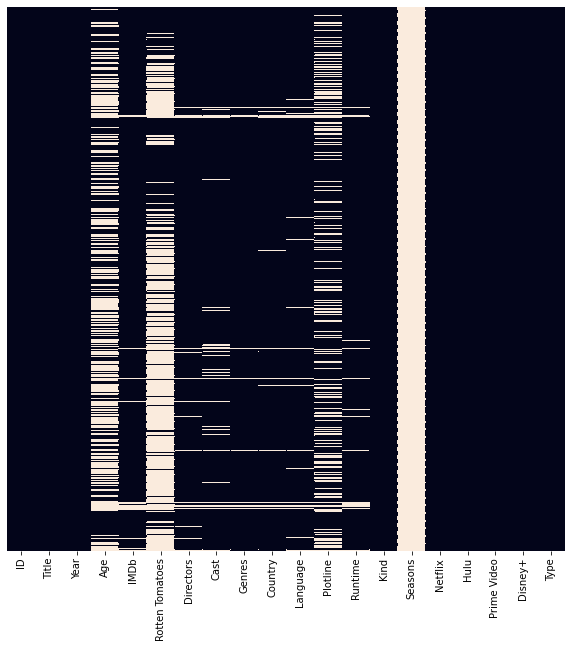

In [8]:
data_investigate(df_movies)

In [9]:
# ID
# df_movies = df_movies.drop(['ID'], axis = 1)
 
# Age
df_movies.loc[df_movies['Age'].isnull() & df_movies['Disney+'] == 1, "Age"] = '13'
# df_movies.fillna({'Age' : 18}, inplace = True)
df_movies.fillna({'Age' : 'NR'}, inplace = True)
df_movies['Age'].replace({'all': '0'}, inplace = True)
df_movies['Age'].replace({'7+': '7'}, inplace = True)
df_movies['Age'].replace({'13+': '13'}, inplace = True)
df_movies['Age'].replace({'16+': '16'}, inplace = True)
df_movies['Age'].replace({'18+': '18'}, inplace = True)
# df_movies['Age'] = df_movies['Age'].astype(int)
 
# IMDb
# df_movies.fillna({'IMDb' : df_movies['IMDb'].mean()}, inplace = True)
# df_movies.fillna({'IMDb' : df_movies['IMDb'].median()}, inplace = True)
df_movies.fillna({'IMDb' : "NA"}, inplace = True)
 
# Rotten Tomatoes
df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].str.replace('%', '').astype(int)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'][df_movies['Rotten Tomatoes'].notnull()].astype(int)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].mean()}, inplace = True)
# df_movies.fillna({'Rotten Tomatoes' : df_movies['Rotten Tomatoes'].median()}, inplace = True)
# df_movies['Rotten Tomatoes'] = df_movies['Rotten Tomatoes'].astype(int)
df_movies.fillna({'Rotten Tomatoes' : "NA"}, inplace = True)
 
# Directors
# df_movies = df_movies.drop(['Directors'], axis = 1)
df_movies.fillna({'Directors' : "NA"}, inplace = True)
 
# Cast
df_movies.fillna({'Cast' : "NA"}, inplace = True)
 
# Genres
df_movies.fillna({'Genres': "NA"}, inplace = True)
 
# Country
df_movies.fillna({'Country': "NA"}, inplace = True)
 
# Language
df_movies.fillna({'Language': "NA"}, inplace = True)
 
# Plotline
df_movies.fillna({'Plotline': "NA"}, inplace = True)
 
# Runtime
# df_movies.fillna({'Runtime' : df_movies['Runtime'].mean()}, inplace = True)
# df_movies['Runtime'] = df_movies['Runtime'].astype(int)
df_movies.fillna({'Runtime' : "NA"}, inplace = True)
 
# Kind
# df_movies.fillna({'Kind': "NA"}, inplace = True)
 
# Type
# df_movies.fillna({'Type': "NA"}, inplace = True)
# df_movies = df_movies.drop(['Type'], axis = 1)
 
# Seasons
# df_movies.fillna({'Seasons': 1}, inplace = True)
# df_movies.fillna({'Seasons': "NA"}, inplace = True)
df_movies = df_movies.drop(['Seasons'], axis = 1)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
# df_movies.fillna({'Seasons' : df_movies['Seasons'].mean()}, inplace = True)
# df_movies['Seasons'] = df_movies['Seasons'].astype(int)
 
# Service Provider
df_movies['Service Provider'] = df_movies.loc[:, ['Netflix', 'Prime Video', 'Disney+', 'Hulu']].idxmax(axis = 1)
# df_movies.drop(['Netflix','Prime Video','Disney+','Hulu'], axis = 1)

# Removing Duplicate and Missing Entries
df_movies.dropna(how = 'any', inplace = True)
df_movies.drop_duplicates(inplace = True)

No of Rows :  16923
No of Coloums :  20
**************************************************
Colums Names : 
 Index(['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Directors',
       'Cast', 'Genres', 'Country', 'Language', 'Plotline', 'Runtime', 'Kind',
       'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type',
       'Service Provider'],
      dtype='object')
**************************************************
Datatype of Columns : 
 ID                   int64
Title               object
Year                 int64
Age                 object
IMDb                object
Rotten Tomatoes     object
Directors           object
Cast                object
Genres              object
Country             object
Language            object
Plotline            object
Runtime             object
Kind                object
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
Service Provider    object
dtype: obje

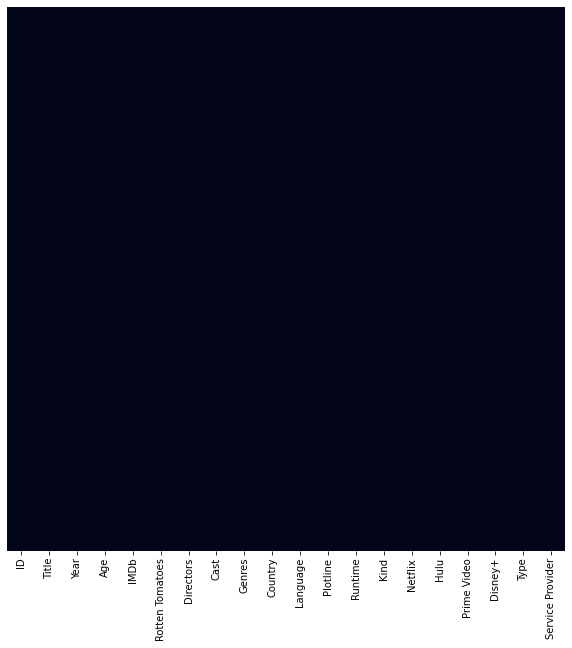

In [10]:
data_investigate(df_movies)

In [11]:
df_movies.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Directors,Cast,Genres,Country,Language,Plotline,Runtime,Kind,Netflix,Hulu,Prime Video,Disney+,Type,Service Provider
0,1,Inception,2010,13,8.8,87,Christopher Nolan,"Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ...","Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French","Dom Cobb is a skilled thief, the absolute best...",148,movie,1,0,0,0,0,Netflix
1,2,The Matrix,1999,16,8.7,88,"Lana Wachowski,Lilly Wachowski","Keanu Reeves,Laurence Fishburne,Carrie-Anne Mo...","Action,Sci-Fi",United States,English,Thomas A. Anderson is a man living two lives. ...,136,movie,1,0,0,0,0,Netflix
2,3,Avengers: Infinity War,2018,13,8.4,85,"Anthony Russo,Joe Russo","Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo...","Action,Adventure,Sci-Fi",United States,English,As the Avengers and their allies have continue...,149,movie,1,0,0,0,0,Netflix
3,4,Back to the Future,1985,7,8.5,96,Robert Zemeckis,"Michael J. Fox,Christopher Lloyd,Lea Thompson,...","Adventure,Comedy,Sci-Fi",United States,English,"Marty McFly, a typical American teenager of th...",116,movie,1,0,0,0,0,Netflix
4,5,"The Good, the Bad and the Ugly",1966,16,8.8,97,Sergio Leone,"Eli Wallach,Clint Eastwood,Lee Van Cleef,Aldo ...",Western,"Italy,Spain,West Germany,United States",Italian,Blondie (The Good) (Clint Eastwood) is a profe...,161,movie,1,0,1,0,0,Netflix


In [12]:
df_movies.describe()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
count,16923.000000,16923.000000,16923.000000,16923.000000,16923.000000,16923.000000,16923.0
mean,8462.000000,2003.211901,0.214915,0.062637,0.727235,0.033150,0.0
std,4885.393638,20.526532,0.410775,0.242315,0.445394,0.179034,0.0
min,1.000000,1901.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4231.500000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,8462.000000,2012.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,12692.500000,2016.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,16923.000000,2020.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [13]:
df_movies.corr()

,ID,Year,Netflix,Hulu,Prime Video,Disney+,Type
ID,1.000000,-0.217816,-0.644470,-0.129926,0.469301,0.263530,NaN
Year,-0.217816,1.000000,0.256151,0.101337,-0.255578,-0.047258,NaN
Netflix,-0.644470,0.256151,1.000000,-0.118032,-0.745141,-0.089649,NaN
Hulu,-0.129926,0.101337,-0.118032,1.000000,-0.284654,-0.039693,NaN
Prime Video,0.469301,-0.255578,-0.745141,-0.284654,1.000000,-0.289008,NaN
Disney+,0.263530,-0.047258,-0.089649,-0.039693,-0.289008,1.000000,NaN
Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# df_movies.sort_values('Year', ascending = True)
# df_movies.sort_values('IMDb', ascending = False)

In [15]:
# df_movies.to_csv(path_or_buf= '/content/drive/MyDrive/Files/updated_ottmovies.csv', index = False)
 
# path = '/content/drive/MyDrive/Files/'
 
# udf_movies = pd.read_csv(path + 'updated_ottmovies.csv')
 
# udf_movies

In [16]:
# df_netflix_movies = df_movies.loc[(df_movies['Netflix'] > 0)]
# df_hulu_movies = df_movies.loc[(df_movies['Hulu'] > 0)]
# df_prime_video_movies = df_movies.loc[(df_movies['Prime Video'] > 0)]
# df_disney_movies = df_movies.loc[(df_movies['Disney+'] > 0)]

In [17]:
df_netflix_only_movies = df_movies[(df_movies['Netflix'] == 1) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_hulu_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 1) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 0)]
df_prime_video_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 1 ) & (df_movies['Disney+'] == 0)]
df_disney_only_movies = df_movies[(df_movies['Netflix'] == 0) & (df_movies['Hulu'] == 0) & (df_movies['Prime Video'] == 0 ) & (df_movies['Disney+'] == 1)]

In [18]:
df_movies_title = df_movies.copy()

In [19]:
df_movies_title.drop(df_movies_title.loc[df_movies_title['Title'] == "NA"].index, inplace = True)
# df_movies_title = df_movies_title[df_movies_title.Title != "NA"]

In [20]:
# Creating distinct dataframes only with the movies present on individual streaming platforms
netflix_title_movies = df_movies_title.loc[df_movies_title['Netflix'] == 1]
hulu_title_movies = df_movies_title.loc[df_movies_title['Hulu'] == 1]
prime_video_title_movies = df_movies_title.loc[df_movies_title['Prime Video'] == 1]
disney_title_movies = df_movies_title.loc[df_movies_title['Disney+'] == 1]

<Figure size 720x720 with 0 Axes>

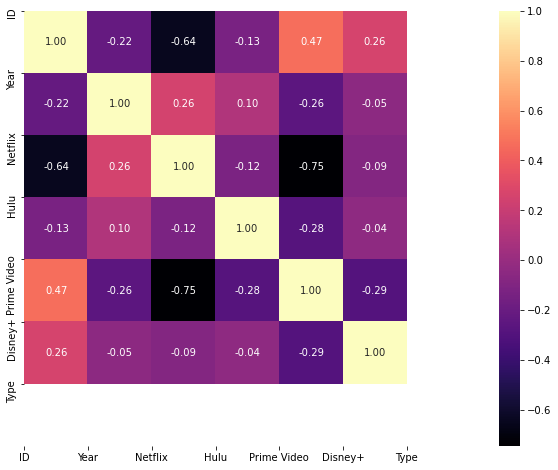

In [21]:
plt.figure(figsize = (10, 10))
corr = df_movies_title.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
# Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
# Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
# show plot
plt.show()
fig.show()

In [22]:
df_movies_title = df_movies_title['Title']
movies_title_w = ' '.join(df_movies_title)

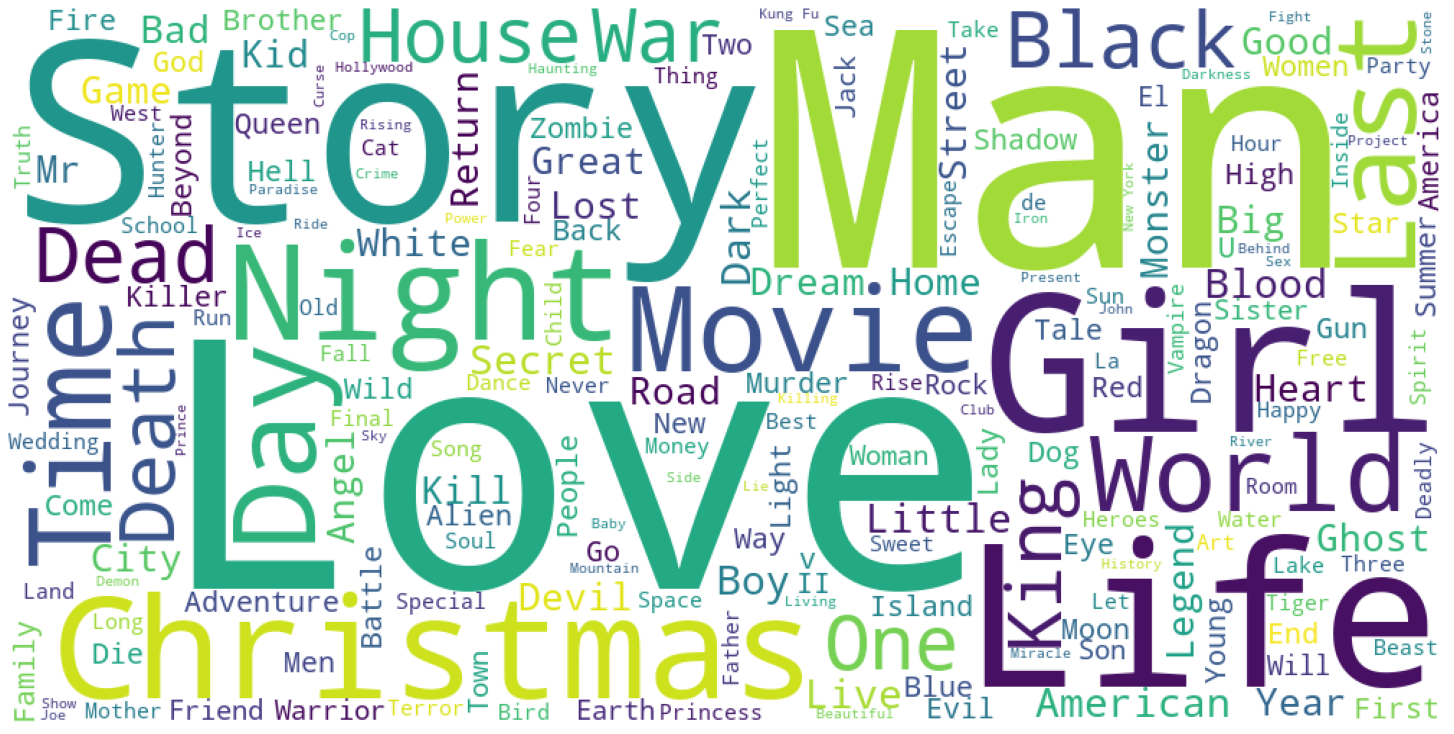

In [23]:
stopwords = set(STOPWORDS)
 
wordcloud_all_title_movies = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(movies_title_w)
  
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_all_title_movies)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [24]:
movies_title_w = movies_title_w.lower()

stop_words_english_movies = set(STOPWORDS)

word_tokens_english_movies = word_tokenize(movies_title_w)

filtered_movie_title = [w for w in word_tokens_english_movies if not w in stop_words_english_movies]

filtered_movie_title = " ".join(filtered_movie_title)

filtered_movie_title = re.sub("'s", '', filtered_movie_title)

filtered_movie_title = re.sub(r'[0-9]+', '', filtered_movie_title)

final_movie_title = re.sub(r'[^\w\s]', '', filtered_movie_title)

title_movies_corpus_len = len(filtered_movie_title.split())
title_movies_corpus_len

41412

In [25]:
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

In [26]:
title_ngram1_movies = FreqDist()

title_ngram1 = extract_ngrams(final_movie_title[:title_movies_corpus_len], 1)

for word in title_ngram1:
    title_ngram1_movies[word.lower()] += 1

In [27]:
title_ngram1_movies.most_common(10)

[('love', 48),
 ('movie', 38),
 ('man', 36),
 ('story', 33),
 ('life', 31),
 ('live', 26),
 ('time', 25),
 ('last', 23),
 ('king', 20),
 ('world', 19)]

In [28]:
title_ngram2_movies = FreqDist()

title_ngram2 = extract_ngrams(final_movie_title[:title_movies_corpus_len], 2)

for word in title_ngram2:
    title_ngram2_movies[word.lower()] += 1

In [29]:
title_ngram2_movies.most_common(10)

[('jeff dunham', 9),
 ('monty python', 7),
 ('kevin hart', 7),
 ('trailer park', 7),
 ('park boys', 7),
 ('bill burr', 5),
 ('john mulaney', 5),
 ('jim gaffigan', 5),
 ('naruto shippuden', 5),
 ('shippuden movie', 5)]

In [30]:
title_ngram3_movies = FreqDist()

title_ngram3 = extract_ngrams(final_movie_title[:title_movies_corpus_len], 3)

for word in title_ngram3:
    title_ngram3_movies[word.lower()] += 1

In [31]:
title_ngram3_movies.most_common(10)

[('trailer park boys', 7),
 ('naruto shippuden movie', 5),
 ('marvel super heroes', 4),
 ('berserk golden age', 3),
 ('golden age arc', 3),
 ('ghost shell arise', 3),
 ('shell arise border', 3),
 ('arise border ghost', 3),
 ('lego marvel super', 3),
 ('back future part', 2)]

In [32]:
title_ngram4_movies = FreqDist()

title_ngram4 = extract_ngrams(final_movie_title[:title_movies_corpus_len], 4)

for word in title_ngram4:
    title_ngram4_movies[word.lower()] += 1

In [33]:
title_ngram4_movies.most_common(10)

[('berserk golden age arc', 3),
 ('ghost shell arise border', 3),
 ('shell arise border ghost', 3),
 ('lego marvel super heroes', 3),
 ('bon cop bad cop', 2),
 ('little pony equestria girls', 2),
 ('surga yang tak dirindukan', 2),
 ('trailer park boys live', 2),
 ('inception matrix avengers infinity', 1),
 ('matrix avengers infinity war', 1)]

In [34]:
title_ngram5_movies = FreqDist()

title_ngram5 = extract_ngrams(final_movie_title[:title_movies_corpus_len], 5)

for word in title_ngram5:
    title_ngram5_movies[word.lower()] += 1

In [35]:
title_ngram5_movies.most_common(10)

[('ghost shell arise border ghost', 3),
 ('inception matrix avengers infinity war', 1),
 ('matrix avengers infinity war back', 1),
 ('avengers infinity war back future', 1),
 ('infinity war back future good', 1),
 ('war back future good bad', 1),
 ('back future good bad ugly', 1),
 ('future good bad ugly spiderman', 1),
 ('good bad ugly spiderman spiderverse', 1),
 ('bad ugly spiderman spiderverse pianist', 1)]

In [36]:
# Netflix Wordcloud
netflix_title_movies_t = netflix_title_movies['Title']
netflix_movies_title_w = ' '.join(netflix_title_movies_t)


The Wordcloud Generated from Titles of Netflix is : 



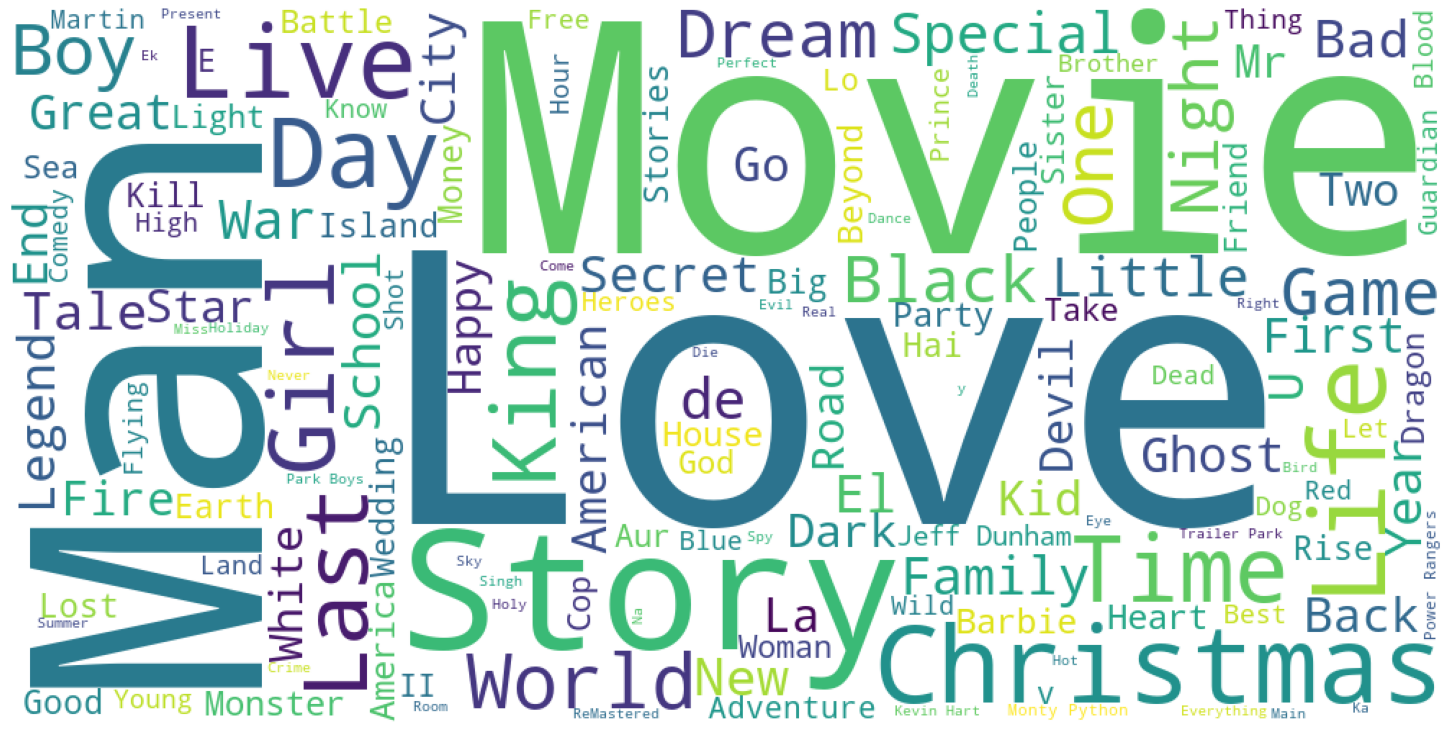

In [37]:
stopwords = set(STOPWORDS)
 
wordcloud_netflix_title_movies = WordCloud(width = 1000, height = 500,
                                           background_color ='white',
                                           stopwords = stopwords,
                                           min_font_size = 10
                                          ).generate(netflix_movies_title_w)

print('\nThe Wordcloud Generated from Titles of Netflix is : \n')
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_netflix_title_movies)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [38]:
# Hulu Wordcloud
hulu_title_movies_t = hulu_title_movies['Title']
hulu_movies_title_w = ' '.join(hulu_title_movies_t)


The Wordcloud Generated from Titles of Hulu is : 



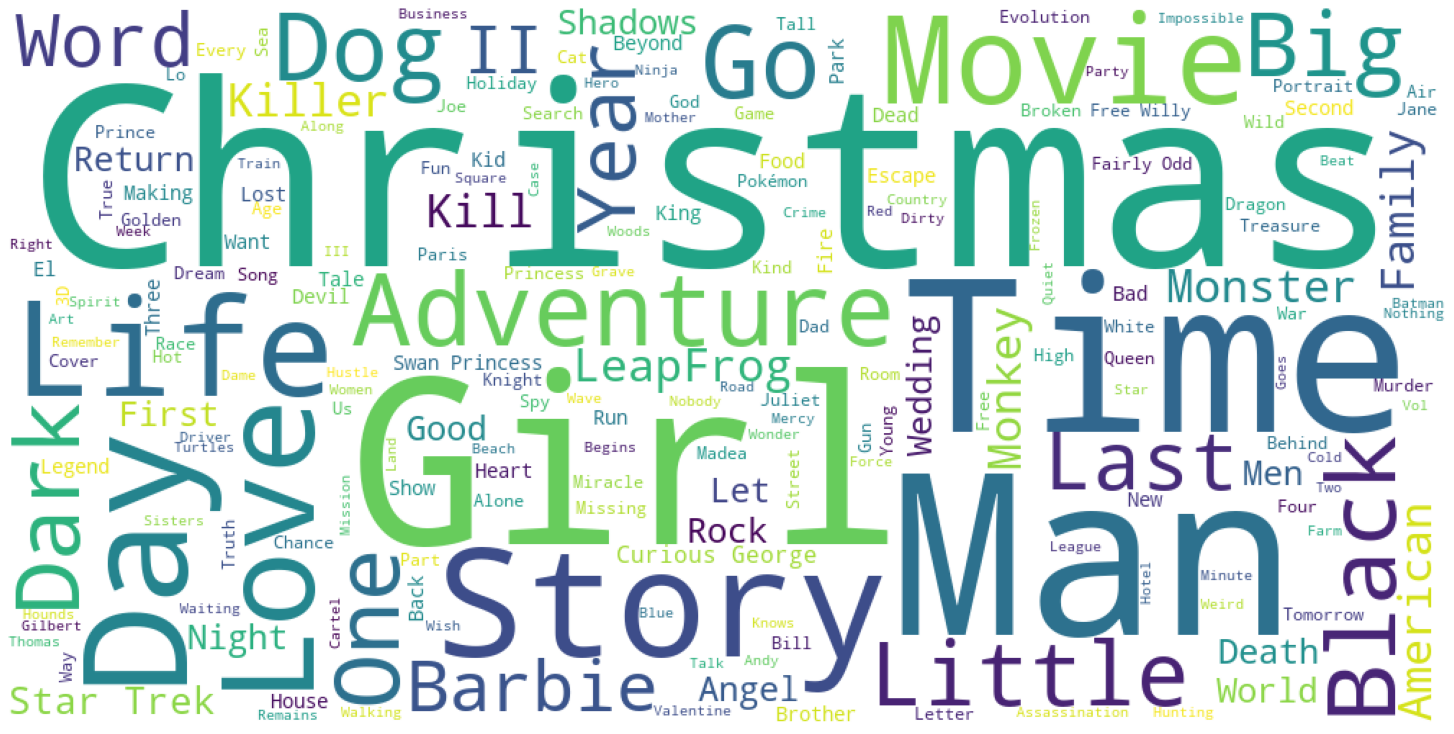

In [39]:
stopwords = set(STOPWORDS)
 
wordcloud_hulu_title_movies = WordCloud(width = 1000, height = 500,
                                        background_color ='white',
                                        stopwords = stopwords,
                                        min_font_size = 10
                                       ).generate(hulu_movies_title_w)
  
print('\nThe Wordcloud Generated from Titles of Hulu is : \n')
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_hulu_title_movies)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [40]:
# Prime Video Wordcloud
prime_video_title_movies_t = prime_video_title_movies['Title']
prime_video_movies_title_w = ' '.join(prime_video_title_movies_t)


The Wordcloud Generated from Titles of Prime Video is : 



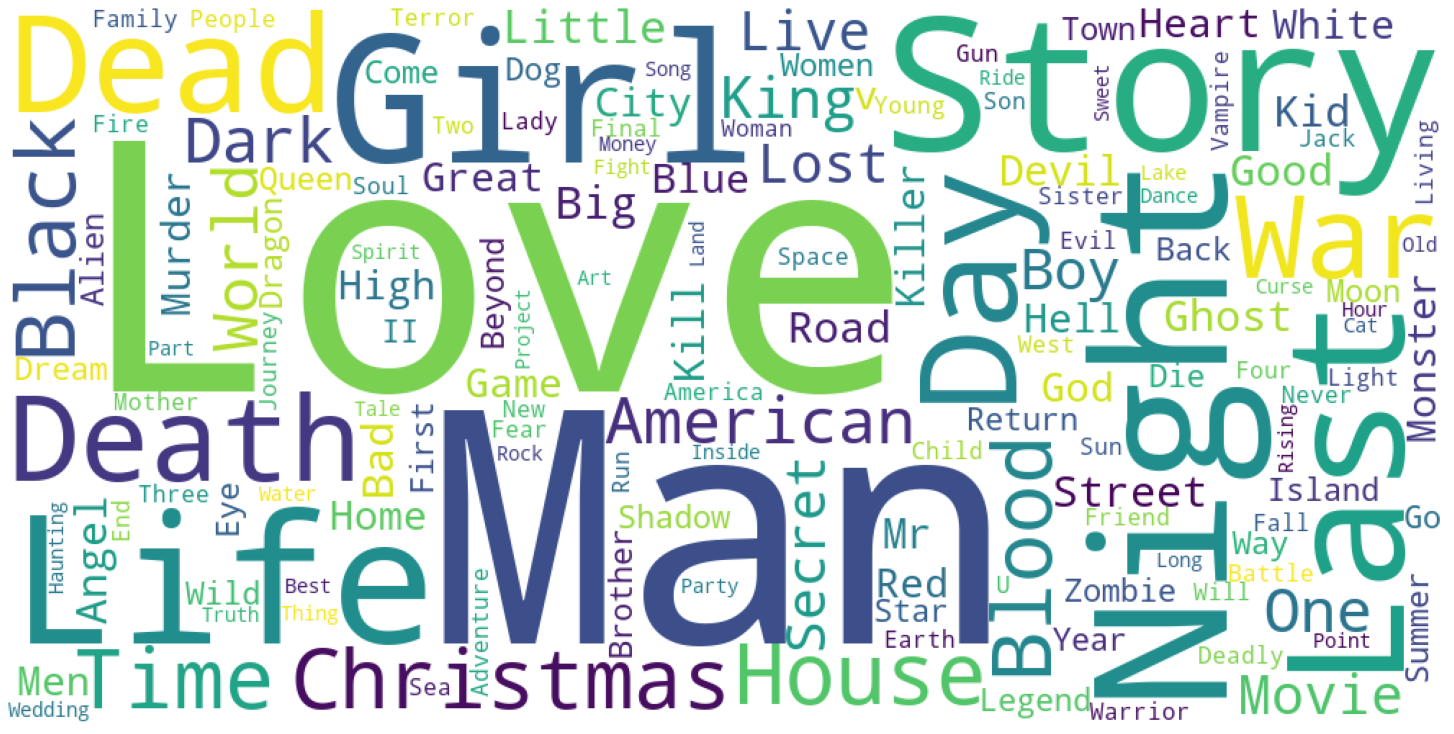

In [41]:
stopwords = set(STOPWORDS)
 
wordcloud_prime_video_title_movies = WordCloud(width = 1000, height = 500,
                                               background_color ='white',
                                               stopwords = stopwords,
                                               min_font_size = 10
                                              ).generate(prime_video_movies_title_w)
  
print('\nThe Wordcloud Generated from Titles of Prime Video is : \n')
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_prime_video_title_movies)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [42]:
# Disney+ Wordcloud
disney_title_movies_t = disney_title_movies['Title']
disney_movies_title_w = ' '.join(disney_title_movies_t)


The Wordcloud Generated from Titles of Disney+ is : 



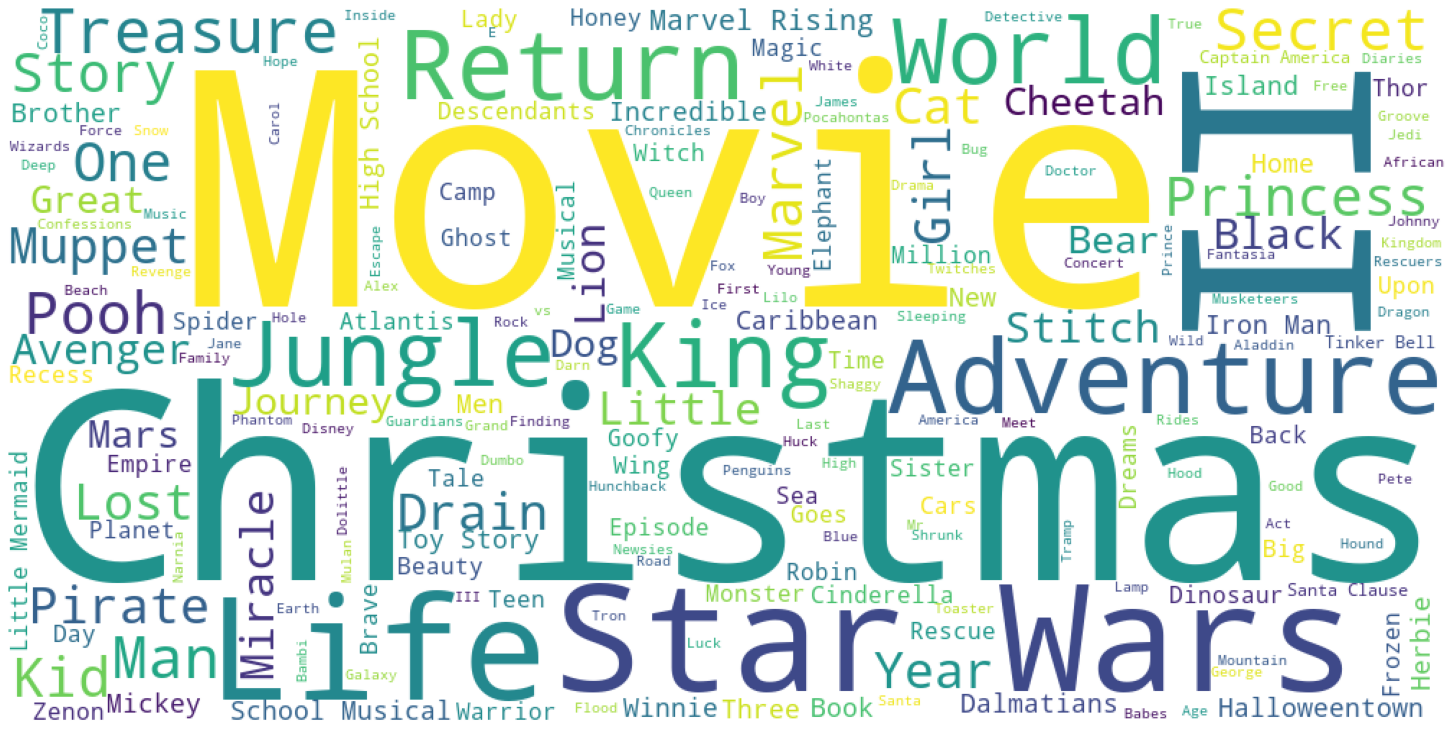

In [43]:
stopwords = set(STOPWORDS)
 
wordcloud_disney_title_movies = WordCloud(width = 1000, height = 500,
                                          background_color ='white',
                                          stopwords = stopwords,
                                          min_font_size = 10
                                         ).generate(disney_movies_title_w)
  
print('\nThe Wordcloud Generated from Titles of Disney+ is : \n')
# plot the WordCloud image                       
plt.figure(figsize = (20, 10), facecolor = None)
plt.imshow(wordcloud_disney_title_movies)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()